In [118]:
from importlib import reload
import cpclasses
import NeuralNetworks
reload(cpclasses)
reload(NeuralNetworks)
from cpclasses import *
from NeuralNetworks import *
import torch



In [119]:
points = torch.tensor([[0.5, 0], [1.0, 0], [1.5, 0], [0.5, 0.2], [1.0, 0.2], [1.5,0.7]])
points_rotated = torch.tensor([[0.433, 0.25], [0.866, 0.5], [1.299, 0.75], [0.333, 0.4232], [0.766, 0.6732], [0.949, 1.3562]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


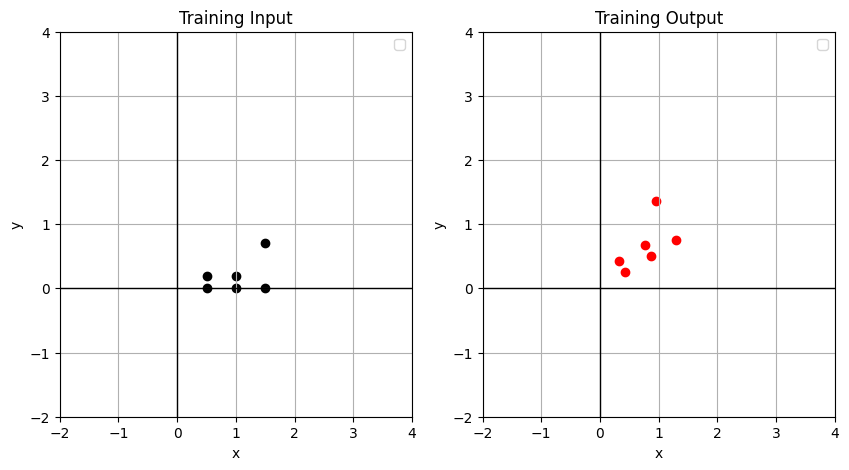

In [120]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(points[:,0], points[:,1], color='black')
coordinate_axes(ax[0])
format_axis(ax[0], title = 'Training Input')


ax[1].scatter(points_rotated[:,0], points_rotated[:,1], color='red')
coordinate_axes(ax[1])
format_axis(ax[1], title = 'Training Output')


for ax in ax:
    ax.set_xlim(-2, 4)
    ax.set_ylim(-2, 4)

In [121]:
model = Linear2x2NoBias()

model.train_model(points, points_rotated, 1000, 0.01, optimizer = torch.optim.Adam)


Layer 1 weights: [[ 1.3116382   0.57103366]
 [ 0.36450687 -1.1467571 ]]
Layer 2 weights: [[ 0.47354427  0.67181474]
 [ 0.5192154  -0.49662626]]


Text(0.5, 1.0, '2x2 without bias')

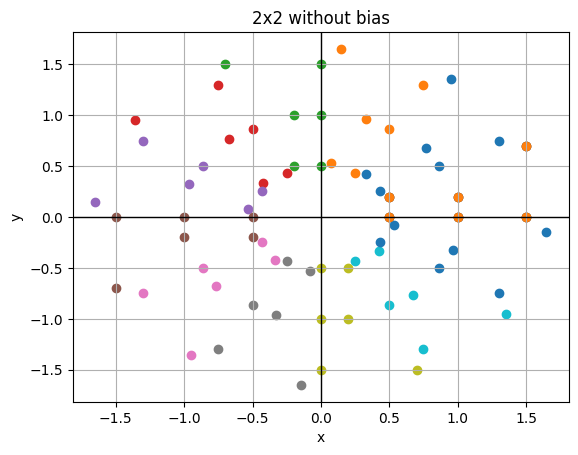

In [ ]:
fig, ax  = plt.subplots()

ax.scatter(points[:,0], points[:,1], color='black', label='Input')
coordinate_axes(ax)

#ax.scatter(points_rotated[:,0], points_rotated[:,1], color='red', label='Output')

new_points = model(points)
for i in range(12):
    with torch.no_grad():
        ax.scatter(new_points[:,0], new_points[:,1], color=f'C{i}')
    new_points = model(new_points)

print(f'Layer 1 weights: {weights[0]}')
print(f'Layer 2 weights: {weights[1]}')


format_axis(ax, legend=False)
ax.set_title('2x2 without bias')

    

In [123]:
model = Linear2x2()

model.train_model(points, points_rotated, 1000, 0.01, optimizer = torch.optim.Adam)


Text(0.5, 1.0, '2x2 with bias')

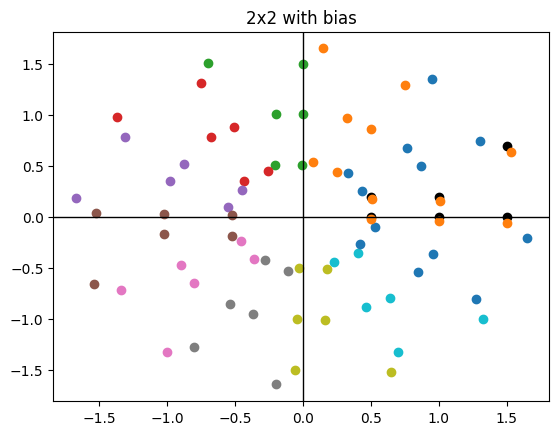

In [124]:
fig, ax  = plt.subplots()

ax.scatter(points[:,0], points[:,1], color='black', label='Input')
coordinate_axes(ax)

#ax.scatter(points_rotated[:,0], points_rotated[:,1], color='red', label='Output')

new_points = model(points)
for i in range(12):
    with torch.no_grad():
        ax.scatter(new_points[:,0], new_points[:,1], color=f'C{i}')
    new_points = model(new_points)


ax.set_title('2x2 with bias')

    

Layer 1 weights: [[0.11148179 1.053739  ]
 [0.72954094 0.23931338]]
Layer 1 bias: [ 0.00966665 -0.50776154]
Layer 2 weights: [[-0.77084166  1.3048407 ]
 [ 0.69013476  0.5799021 ]]
Layer 2 bias: [0.6699995  0.28778088] 

Layer 1 weights: [[-0.58158314 -1.2776512 ]
 [ 0.72965765 -0.84370834]]
Layer 1 bias: [-0.6307365  -0.51575744]
Layer 2 weights: [[-0.25709063  0.9819414 ]
 [-0.7405379   0.09499713]]
Layer 2 bias: [ 0.34428647 -0.41808835] 

Layer 1 weights: [[ 1.3116382   0.57103366]
 [ 0.36450687 -1.1467571 ]]
Layer 1 bias: [ 0.0970589 -0.7283935]
Layer 2 weights: [[ 0.47354427  0.67181474]
 [ 0.5192154  -0.49662626]]
Layer 2 bias: [ 0.44338366 -0.41213268] 



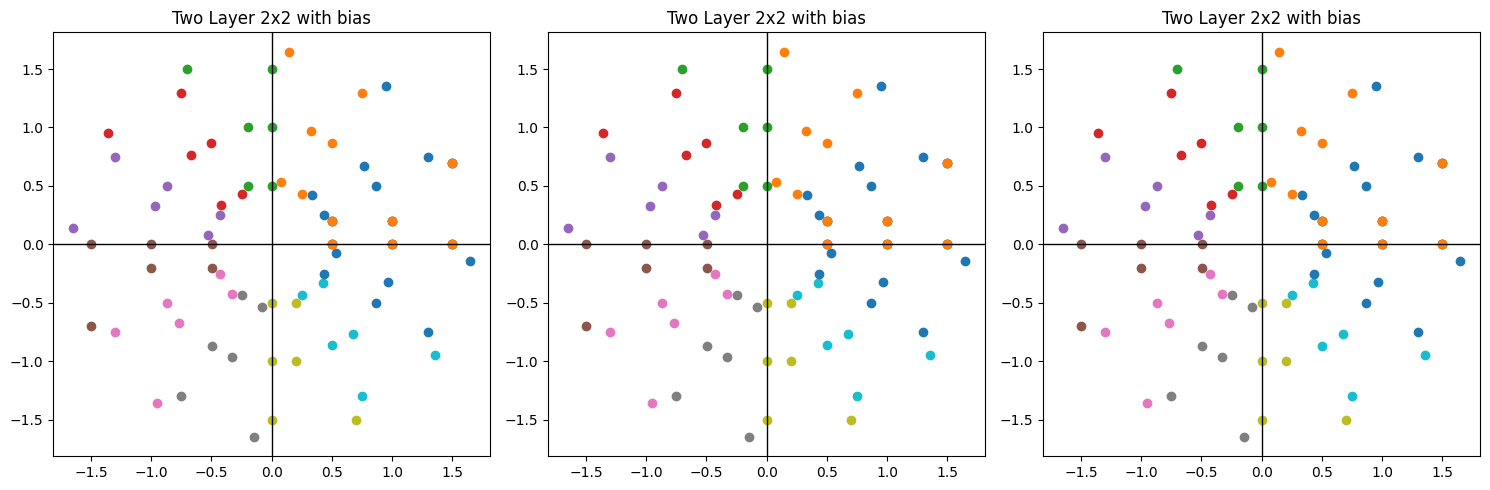

In [137]:
fig, axs  = plt.subplots(1,3, figsize=(15,5))

for ax in axs:
    model = TwoLinear2x2()

    model.train_model(points, points_rotated, 1000, 0.01, optimizer = torch.optim.Adam)

    ax.scatter(points[:,0], points[:,1], color='black', label='Input')
    coordinate_axes(ax)

    weights = [model.layer1.weight.detach().numpy(), model.layer2.weight.detach().numpy()]
    bias = [model.layer1.bias.detach().numpy(), model.layer2.bias.detach().numpy()]

    #ax.scatter(points_rotated[:,0], points_rotated[:,1], color='red', label='Output')

    new_points = model(points)
    for i in range(12):
        with torch.no_grad():
            ax.scatter(new_points[:,0], new_points[:,1], color=f'C{i}')
        new_points = model(new_points)
    

    ax.set_title('Two Layer 2x2 with bias')
    print(f'Layer 1 weights: {weights[0]}')
    print(f'Layer 1 bias: {bias[0]}')
    print(f'Layer 2 weights: {weights[1]}')
    print(f'Layer 2 bias: {bias[1]} \n')
fig.tight_layout()